In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import os
from os import listdir

In [2]:
tables = pd.read_csv('../../src/data/data/CSV_files/detailed_columnStatistics_all_files.csv')
tables = tables.rename(columns={'sum_NA_tables':'sum_NA_sel_col'})
tables['label']=tables['Class']+'_'+tables['columns']
tables

,Unnamed: 0,Class,columns,filename,num_columns,num_columns_selected,num_rows,num_NAs,percentage_col_NA,sum_NA_sel_col,percentage_table_NA,label
0,0,Book,name,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,1,0.003650,336.0,0.245255,Book_name
1,0,Book,author,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,40,0.145985,336.0,0.245255,Book_author
2,0,Book,publisher,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,157,0.572993,336.0,0.245255,Book_publisher
3,0,Book,offers,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,0,0.000000,336.0,0.245255,Book_offers
4,0,Book,bookedition,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,138,0.503650,336.0,0.245255,Book_bookedition
...,...,...,...,...,...,...,...,...,...,...,...,...
459242,208,TVEpisode,name,TVEpisode_foodnetwork.com_September2020.json.gz,7.0,3.0,431.0,0,0.000000,114.0,0.088167,TVEpisode_name
459243,208,TVEpisode,episodenumber,TVEpisode_foodnetwork.com_September2020.json.gz,7.0,3.0,431.0,0,0.000000,114.0,0.088167,TVEpisode_episodenumber
459244,208,TVEpisode,partofseries,TVEpisode_foodnetwork.com_September2020.json.gz,7.0,3.0,431.0,114,0.264501,114.0,0.088167,TVEpisode_partofseries
459245,209,TVEpisode,name,TVEpisode_vavivov.com_September2020.json.gz,9.0,2.0,63.0,0,0.000000,0.0,0.000000,TVEpisode_name


In [3]:
full_table=pd.concat([tables,pd.get_dummies(tables['label'])], axis=1)
sum = full_table.groupby('filename').sum()
sum =sum.drop(columns={'num_rows', 'num_columns', 'num_columns_selected', 'num_NAs', 'percentage_col_NA', 'percentage_table_NA'})
full_table = full_table.groupby('filename').agg({'Class':'first','num_rows':'first','num_columns':'first', 'num_columns_selected' :'first', 'num_NAs':'sum', 'percentage_col_NA':'max', 'percentage_table_NA':'mean'})
full_table = full_table.merge(sum, how='inner', on='filename')
full_table

,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,Unnamed: 0,sum_NA_sel_col,Book_aggregaterating,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
filename,,,,,,,,,,,,,,,,,,,,,
Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.286885,0.090710,3925,830.0,1,...,0,0,0,0,0,0,0,0,0,0
Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,3310,0.0,0,...,0,0,0,0,0,0,0,0,0,0
Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,3861,0.0,1,...,0,0,0,0,0,0,0,0,0,0
Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,6408,0.0,1,...,0,0,0,0,0,0,0,0,0,0
Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.001740,0.000658,2635,85.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TVEpisode_yesmoviess.com_September2020.json.gz,TVEpisode,37.0,9.0,2.0,0,0.000000,0.000000,196,0.0,0,...,0,0,0,0,0,0,0,0,1,1
TVEpisode_yidio.com_September2020.json.gz,TVEpisode,12606.0,9.0,3.0,8590,0.681422,0.227141,39,25770.0,0,...,0,0,0,0,0,0,0,1,1,1
TVEpisode_zazangels.com_September2020.json.gz,TVEpisode,38.0,8.0,2.0,0,0.000000,0.000000,44,0.0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
full_table.drop(full_table.columns[7], axis=1, inplace=True)
full_table

,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
filename,,,,,,,,,,,,,,,,,,,,,
Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.286885,0.090710,830.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.001740,0.000658,85.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TVEpisode_yesmoviess.com_September2020.json.gz,TVEpisode,37.0,9.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
TVEpisode_yidio.com_September2020.json.gz,TVEpisode,12606.0,9.0,3.0,8590,0.681422,0.227141,25770.0,0,0,...,0,0,0,0,0,0,0,1,1,1
TVEpisode_zazangels.com_September2020.json.gz,TVEpisode,38.0,8.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [5]:
full_table.to_csv('../../src/data/data/CSV_files/dummy_overview_all.csv')

In [6]:
full_table.describe()

,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,Book_bookedition,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
count,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,...,79318.00000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000
mean,296.400086,9.511158,5.789947,173.963047,0.250794,0.079808,1279.497264,0.002370,0.011422,0.002408,...,0.00145,0.009229,0.001601,0.003719,0.007741,0.008233,0.008813,0.001399,0.002648,0.002017
std,1344.816346,3.066168,2.621034,954.541809,0.265770,0.101381,8100.880605,0.048627,0.106264,0.049013,...,0.03805,0.095622,0.039983,0.060872,0.087642,0.090360,0.093462,0.037383,0.051387,0.044868
min,3.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,9.000000,5.000000,10.000000,0.145833,0.038095,50.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,11.000000,6.000000,69.000000,0.488889,0.128205,445.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,222817.000000,35.000000,24.000000,47753.000000,1.000000,0.818182,657407.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
relevant =full_table[(full_table['num_rows']>=10) & (full_table['percentage_col_NA']<0.50) & (full_table['percentage_table_NA']<0.30)]
relevant.reset_index()

,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
0,Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.286885,0.090710,830.0,1,...,0,0,0,0,0,0,0,0,0,0
1,Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.001740,0.000658,85.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54185,TVEpisode_yara-online.org_September2020.json.gz,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,1,1
54186,TVEpisode_yesmoviess.com_September2020.json.gz,TVEpisode,37.0,9.0,2.0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,1,1
54187,TVEpisode_zazangels.com_September2020.json.gz,TVEpisode,38.0,8.0,2.0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,1,1
54188,TVEpisode_zebrahead.org_September2020.json.gz,TVEpisode,80.0,7.0,2.0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,1,1


In [13]:
relevant.to_csv('../../src/data/data/CSV_files/relevant_tables.csv')

In [80]:
small = relevant[relevant['num_rows']<=40]
small

,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
filename,,,,,,,,,,,,,,,,,,,,,
Book_aardvark-books.com_September2020.json.gz,Book,26.0,9.0,7.0,5,0.027473,0.027473,35.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_americanreadingathome.com_September2020.json.gz,Book,33.0,9.0,5.0,3,0.018182,0.018182,15.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_barmatrioshka.com_September2020.json.gz,Book,35.0,11.0,9.0,0,0.000000,0.000000,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_bibliobeat.com_September2020.json.gz,Book,22.0,10.0,6.0,0,0.000000,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_bookapy.com_September2020.json.gz,Book,26.0,13.0,8.0,11,0.052885,0.052885,88.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TVEpisode_wussmovie.com_September2020.json.gz,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
TVEpisode_yara-online.org_September2020.json.gz,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
TVEpisode_yesmoviess.com_September2020.json.gz,TVEpisode,37.0,9.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [81]:
medium = relevant[(relevant['num_rows']>40) & (relevant['num_rows']<=160)]
medium

,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
filename,,,,,,,,,,,,,,,,,,,,,
Book_addicusbooks.com_September2020.json.gz,Book,89.0,13.0,7.0,46,0.073836,0.073836,322.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_amle.org_September2020.json.gz,Book,41.0,8.0,6.0,16,0.065041,0.065041,96.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_auxlettresdemonmoulin.com_September2020.json.gz,Book,141.0,8.0,6.0,90,0.106383,0.106383,540.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_babcockbooks.com_September2020.json.gz,Book,138.0,8.0,5.0,102,0.147826,0.147826,510.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_bartleby.com_September2020.json.gz,Book,62.0,10.0,8.0,20,0.040323,0.040323,160.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TVEpisode_wireless-satellite-internet.com_September2020.json.gz,TVEpisode,54.0,8.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
TVEpisode_ww2d.org_September2020.json.gz,TVEpisode,54.0,8.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
TVEpisode_wybrzezak.org_September2020.json.gz,TVEpisode,50.0,7.0,2.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [82]:
large = relevant[relevant['num_rows']>160]
large

,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
filename,,,,,,,,,,,,,,,,,,,,,
Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.090710,0.090710,830.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.000658,0.000658,85.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TVEpisode_usanetwork.com_September2020.json.gz,TVEpisode,306.0,12.0,3.0,0,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1
TVEpisode_vh1.com_September2020.json.gz,TVEpisode,1448.0,9.0,3.0,8,0.001842,0.001842,24.0,0,0,...,0,0,0,0,0,0,0,1,1,1
TVEpisode_wikidex.net_September2020.json.gz,TVEpisode,504.0,9.0,2.0,34,0.033730,0.033730,68.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [99]:
#large_classes = large['Class'].value_counts()
#large_classes = pd.DataFrame(large_classes)
#large_classes = large_classes.reset_index()
large_classes = large_classes.rename(columns={'index':'Category', 'Class':'Count'})
large_classes

,Category,Count
0,Product,9961
1,Recipe,1409
2,Person,1044
3,CreativeWork,1024
4,Event,989
5,LocalBusiness,858
6,Book,553
7,Hotel,254
8,Restaurant,184
9,MusicRecording,160


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, 'Product'),
 Text(1, 0, 'Recipe'),
 Text(2, 0, 'Person'),
 Text(3, 0, 'CreativeWork'),
 Text(4, 0, 'Event'),
 Text(5, 0, 'LocalBusiness'),
 Text(6, 0, 'Book'),
 Text(7, 0, 'Hotel'),
 Text(8, 0, 'Restaurant'),
 Text(9, 0, 'MusicRecording'),
 Text(10, 0, 'Place'),
 Text(11, 0, 'MusicAlbum'),
 Text(12, 0, 'TVEpisode')]

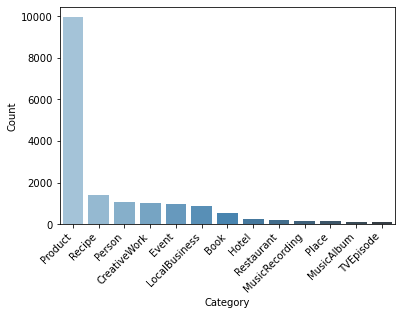

In [130]:
plot = sns.barplot(data=large_classes, x='Category', y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


In [137]:
medium_classes = medium['Class'].value_counts()
medium_classes = pd.DataFrame(medium_classes)
medium_classes = medium_classes.reset_index()
medium_classes = medium_classes.rename(columns={'index':'Category', 'Class':'Count'})
medium_classes

,Category,Count
0,Product,8969
1,Recipe,2547
2,Event,2499
3,CreativeWork,1609
4,Person,1571
5,LocalBusiness,1032
6,MusicRecording,961
7,Hotel,338
8,Place,296
9,Restaurant,250


[Text(0, 0, 'Product'),
 Text(1, 0, 'Recipe'),
 Text(2, 0, 'Event'),
 Text(3, 0, 'CreativeWork'),
 Text(4, 0, 'Person'),
 Text(5, 0, 'LocalBusiness'),
 Text(6, 0, 'MusicRecording'),
 Text(7, 0, 'Hotel'),
 Text(8, 0, 'Place'),
 Text(9, 0, 'Restaurant'),
 Text(10, 0, 'Book'),
 Text(11, 0, 'TVEpisode'),
 Text(12, 0, 'MusicAlbum')]

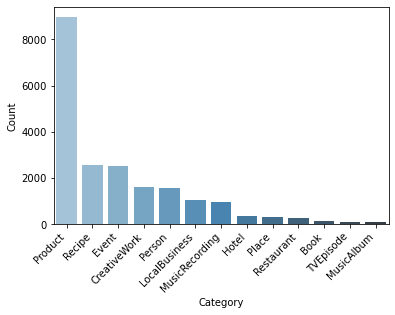

In [144]:
plot = sns.barplot(data=medium_classes, x='Category', y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [139]:
small_classes = small['Class'].value_counts()
small_classes = pd.DataFrame(small_classes)
small_classes = small_classes.reset_index()
small_classes = small_classes.rename(columns={'index':'Category', 'Class':'Count'})
small_classes

,Category,Count
0,Product,5870
1,MusicRecording,4699
2,Event,2445
3,CreativeWork,2171
4,Recipe,1646
5,Person,1146
6,LocalBusiness,868
7,Place,293
8,Hotel,291
9,Restaurant,236


[Text(0, 0, 'Product'),
 Text(1, 0, 'MusicRecording'),
 Text(2, 0, 'Event'),
 Text(3, 0, 'CreativeWork'),
 Text(4, 0, 'Recipe'),
 Text(5, 0, 'Person'),
 Text(6, 0, 'LocalBusiness'),
 Text(7, 0, 'Place'),
 Text(8, 0, 'Hotel'),
 Text(9, 0, 'Restaurant'),
 Text(10, 0, 'MusicAlbum'),
 Text(11, 0, 'Book'),
 Text(12, 0, 'TVEpisode')]

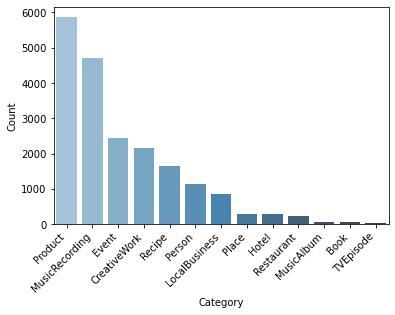

In [145]:
plot = sns.barplot(data=small_classes, x='Category', y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [147]:
small.to_csv('../../src/data/schemafiltereddata/small_tables.csv')
medium.to_csv('../../src/data/schemafiltereddata/medium_tables.csv')
large.to_csv('../../src/data/schemafiltereddata/large_tables.csv')